# Testing non-default Hypers with BlockRNN

In [1]:
from utils import (
    BaseForecaster, 
    ResidualForecaster,
    TimeSeriesPreprocessor,
    crps,
    HistoricalForecaster
)
from plotting_utils import (
    plot_forecast,
    plot_crps_bydate,
    score_improvement_bysite,
    plot_improvement_bysite,
    plot_global_percentages,
    plot_region_percentages,
    plot_site_type_percentages_bymodel,
    plot_site_type_percentages_global,
    plot_window_and_sitetype_performance,
)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from darts import TimeSeries
import numpy as np
import CRPS.CRPS as forecastscore
from darts.metrics import rmse
import matplotlib as mpl
from sklearn.cluster import KMeans

targets = pd.read_csv("targets.csv.gz")
metadata = pd.read_csv('NEON_Field_Site_Metadata_20220412.csv')
metadata = metadata.loc[metadata.aquatics == 1][['field_site_id', 'field_site_subtype', 'field_latitude', 'field_longitude']]

# Performing K-Means clustering
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
metadata['cluster'] = kmeans.fit_predict(metadata[['field_latitude', 'field_longitude']])
region_mapping = {
    0: 'East',
    1: 'Alaska',
    2: 'West',
    3: 'Mid',
    4: 'Puerto Rico'
}
metadata['region'] = metadata['cluster'].map(region_mapping)

/home/rstudio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
model_names = ["BlockRNN"]
target_variables = ['oxygen']
test_dict = {}
for model in model_names:
    test_dict[model] = {}
    for target_variable in target_variables:
        test_dict[model][target_variable] = score_improvement_bysite(model, targets, target_variable, suffix='test')

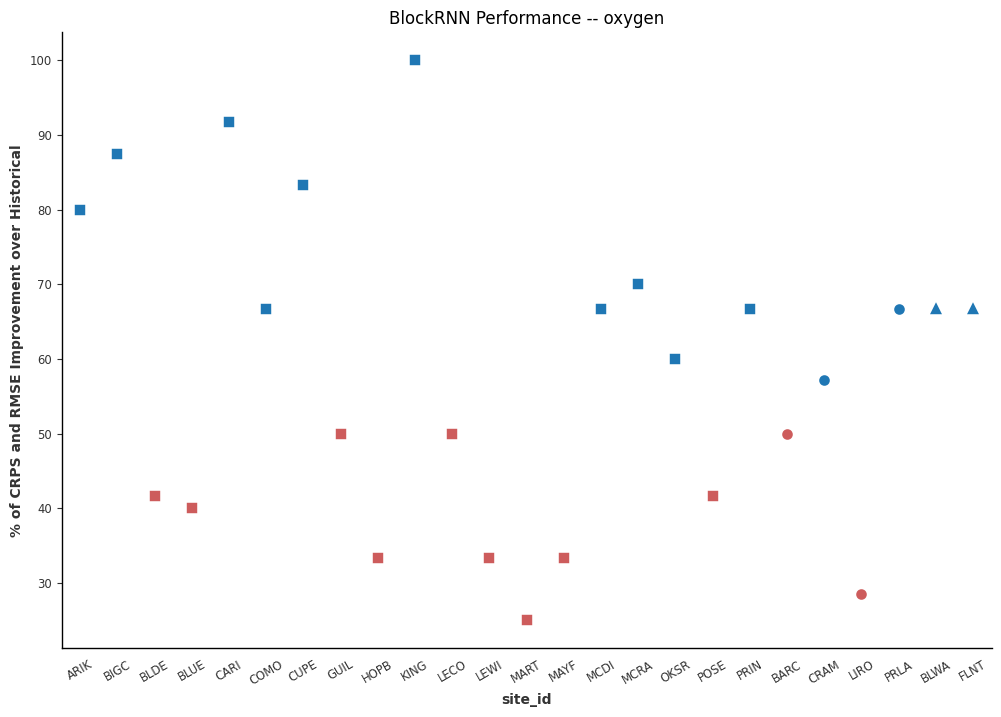

In [13]:
for model in model_names:
    plot_improvement_bysite(test_dict[model]['oxygen'], metadata, f'{model} Performance -- oxygen')